In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import normalize
from scipy.spatial import distance
from utils import linear_models as lm
from utils import plot as graph_plotter

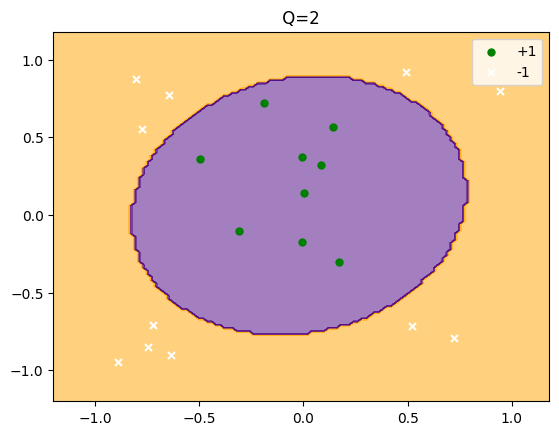

In [2]:
def plotting_results(df, cls, tit):
    xsp1 = df.loc[df['y']==1]['x1'].values
    ysp1 = df.loc[df['y']==1]['x2'].values
    xsm1 = df.loc[df['y']==-1]['x1'].values
    ysm1 = df.loc[df['y']==-1]['x2'].values    
    
    x1_min, x1_max = -1.2, 1.2
    x2_min, x2_max = -1.2, 1.2
    xx1, xx2 = graph_plotter.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
    graph_plotter.plot_decision_boundaries(xx1, xx2, 2, cls, alpha=0.5)

    graph_plotter.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
                   colors = ['g', 'w'], markers = ['o', 'x'], labels = ['+1', '-1'], 
                   title = tit, yscale = None, ylb = -1, yub = 1,
                   xlb = 0, xub = 1, xlabel = None, ylabel = None,
                   legends = ['+1', '-1'], legendx = None, legendy = None, marker_sizes=[25, 25])

def generate_raw_data():
    datap = np.array([[-0.494, 0.363], [-0.311, -0.101], [-0.0064, 0.374], 
                      [-0.0089, -0.173], [0.0014, 0.138], [-0.189, 0.718],
                     [0.085, 0.32208], [0.171, -0.302], [0.142, 0.568]])
    datan = np.array([[0.491, 0.920], [-0.892, -0.946], [-0.721, -0.710],
                     [0.519, -0.715], [-0.775, 0.551], [-0.646, 0.773],
                     [-0.803, 0.878], [0.944, 0.801], [0.724, -0.795],
                     [-0.748, -0.853], [-0.635, -0.905]])
    p_df = pd.DataFrame(datap, columns=['x1', 'x2'])
    p_df['y'] = 1
    n_df = pd.DataFrame(datan, columns=['x1', 'x2'])
    n_df['y'] = -1
    df = pd.concat([p_df, n_df])
    return df

df = generate_raw_data()

X_train = df[['x1', 'x2']].values
y_train = df['y'].values

reg_type = None
lambda_t = 0

Q = 2
lr2 = lm.LinearRegression('pesudo_inv', reg_type, reg_param = lambda_t, poly_degree = Q, to_classify=True)
lr2.fit(X_train, y_train)

Q = 3
lr3 = lm.LinearRegression('pesudo_inv', reg_type, reg_param = lambda_t, poly_degree = Q, to_classify=True)
lr3.fit(X_train, y_train)

plotting_results(df, lr2, " Q=2 ")

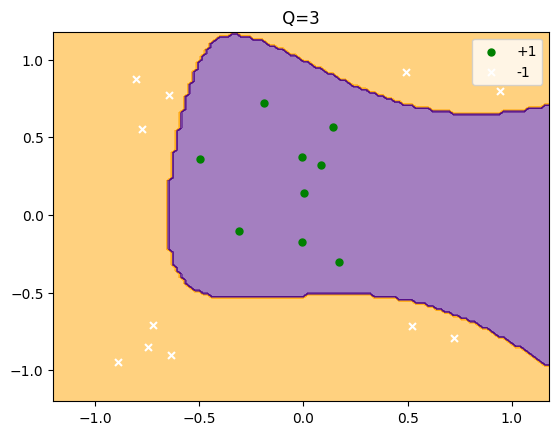

In [3]:
plotting_results(df, lr3, " Q=3 ")

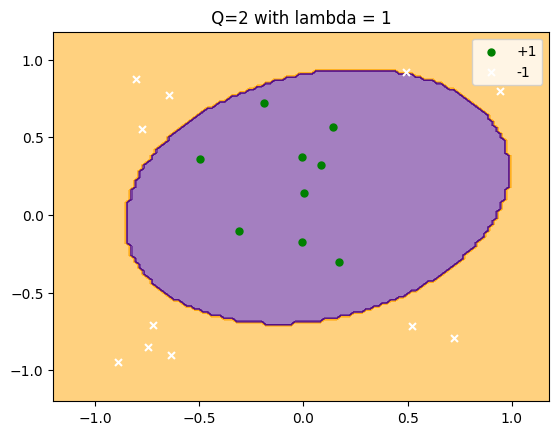

In [4]:
reg_type = None
lambda_t = 1
Q = 2
lr2 = lm.LinearRegression('pesudo_inv', reg_type, reg_param = lambda_t, 
                          poly_degree = Q, to_classify=True)
lr2.fit(X_train, y_train)

Q = 3
lr3 = lm.LinearRegression('pesudo_inv', reg_type, reg_param = lambda_t, 
                          poly_degree = Q, to_classify=True)
lr3.fit(X_train, y_train)

plotting_results(df, lr2, " Q=2 with lambda = 1 ")

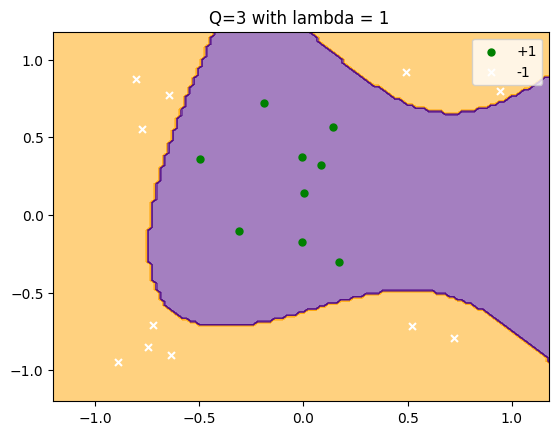

In [5]:
plotting_results(df, lr3, "Q=3 with lambda = 1 ")